In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [4]:
"""
Dataset sintético.
samples: cantidad de datos
classes: cuantas clases tendrá
state: la semilla para reproducir
"""
X, y = make_classification(n_samples=1000, n_classes=2,random_state=1)

In [5]:
#División en 50 y 50
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
ns_probs = [0 for _ in range(len(testy))]

In [6]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:,1]

ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

#Imprimimos en pantalla
print ('Sin entrenar: ROC AUC=%.3F' % (ns_auc))
print ('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.903


In [8]:
#Curvas de ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

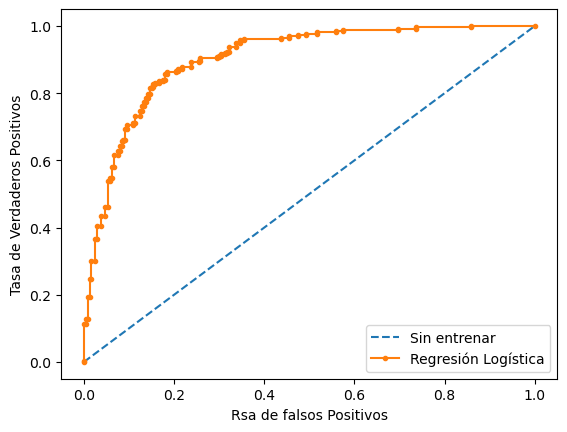

In [10]:
#Graficación
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr,lr_tpr, marker=".", label="Regresión Logística")

pyplot.xlabel('Rsa de falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()